# **Connecting SQL Database**

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans

# Connect to the SQLite database
conn = sqlite3.connect('/content/drive/MyDrive/accident_data_v1.0.0_2023 (1).db')

# Load data from the correct table, which is named 'accident'
query = "SELECT * FROM accident;"
df = pd.read_sql_query(query, conn)

# Show the first few rows of the dataframe to confirm it's loaded correctly
print(df.head())

# Show summary statistics and information about the dataframe
print(df.describe())
print(df.info())




  accident_index  accident_year accident_reference  location_easting_osgr  \
0  2017010001708           2017          010001708               532920.0   
1  2017010009342           2017          010009342               526790.0   
2  2017010009344           2017          010009344               535200.0   
3  2017010009348           2017          010009348               534340.0   
4  2017010009350           2017          010009350               533680.0   

   location_northing_osgr  longitude   latitude  police_force  \
0                196330.0  -0.080107  51.650061             1   
1                181970.0  -0.173845  51.522425             1   
2                181260.0  -0.052969  51.514096             1   
3                193560.0  -0.060658  51.624832             1   
4                187820.0  -0.072372  51.573408             1   

   accident_severity  number_of_vehicles  ...  \
0                  1                   2  ...   
1                  3                   2  ...   

# **Task 1: Analyzing Significant Hours and Days for Accidents**

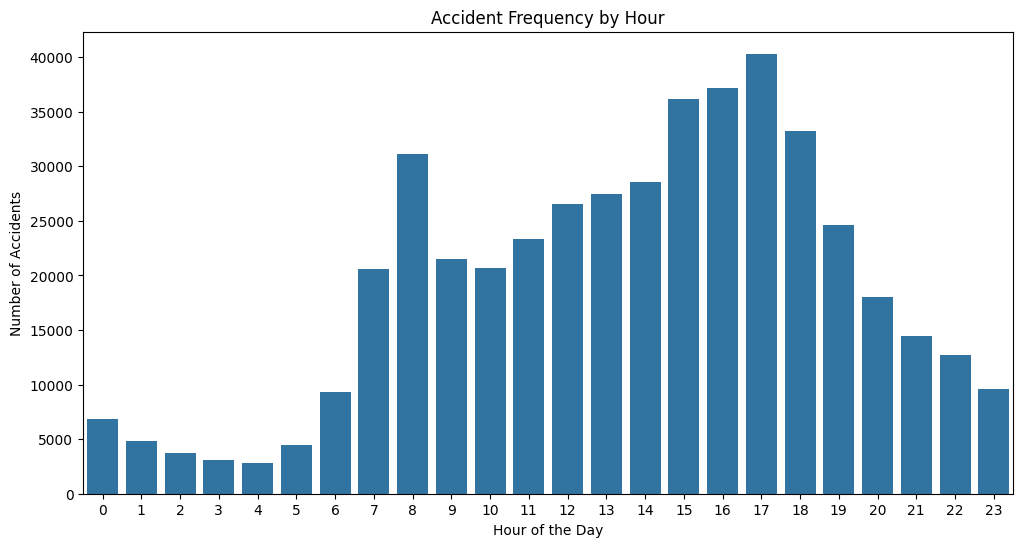

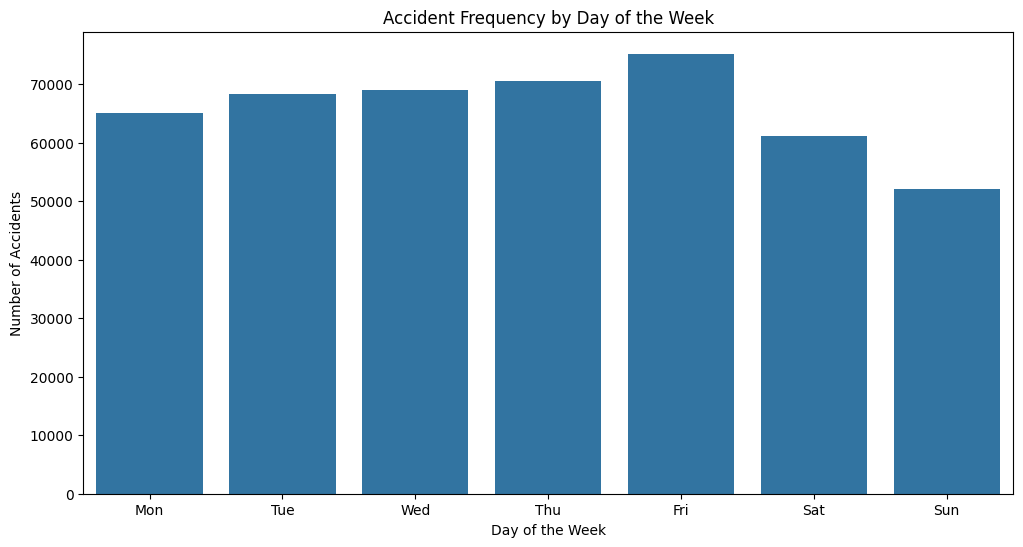

In [2]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], dayfirst=True)

# Extract hour and day of week from datetime
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek # Monday=0, Sunday=6

# Plotting the frequency of accidents by hour of the day
plt.figure(figsize=(12, 6))
sns.countplot(x='hour', data=df)
plt.title('Accident Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.show()

# Plotting the frequency of accidents by day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df)
plt.title('Accident Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()



# **Task 2: Motorbike Accidents by Hour Time**

Number of motorbike accidents: 646136


<ipython-input-3-ee5d570e351a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motorbike_accidents['hour'] = motorbike_accidents['datetime'].dt.hour


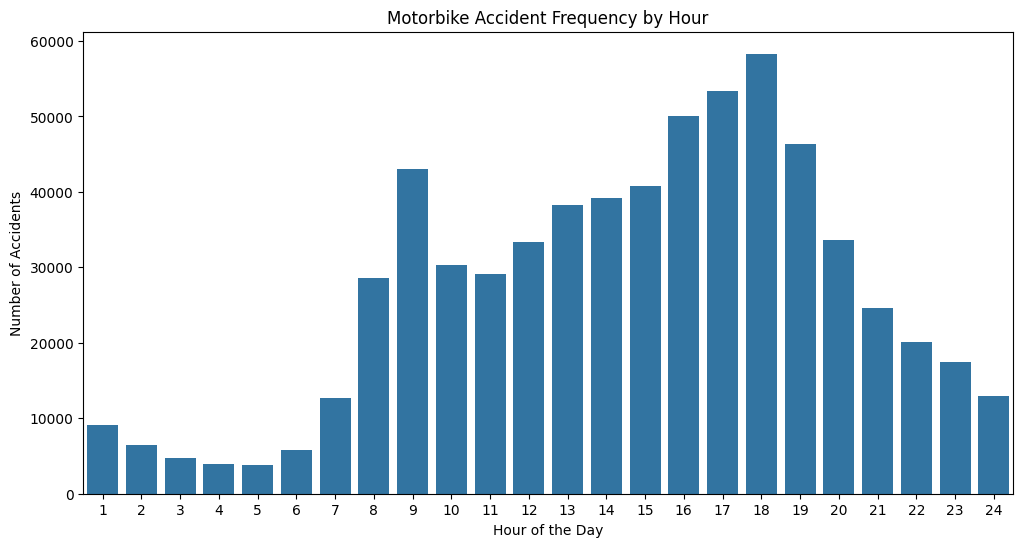

In [3]:
# Load the vehicle data
vehicle_query = "SELECT accident_index, vehicle_type FROM vehicle;"
vehicles_df = pd.read_sql_query(vehicle_query, conn)

# Merge the vehicle data with the accident data
full_df = pd.merge(df, vehicles_df, on='accident_index', how='left')

# Define motorcycle codes
motorcycle_codes = [9, 19, 20]

# Filter motorbike accidents
motorbike_accidents = full_df[full_df['vehicle_type'].isin(motorcycle_codes)]

# Check if there are motorbike accidents in the filtered dataframe
print("Number of motorbike accidents:", motorbike_accidents.shape[0])

# If there are motorbike accidents, then plot the frequency by hour
if motorbike_accidents.shape[0] > 0:
    # Extract hour from datetime for plotting
    motorbike_accidents['hour'] = motorbike_accidents['datetime'].dt.hour
    plt.figure(figsize=(12, 6))
    sns.countplot(x='hour', data=motorbike_accidents)
    plt.title('Motorbike Accident Frequency by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    plt.xticks(ticks=range(0, 24), labels=range(1, 25))  # Assuming hour is in 24-hour format
    plt.show()
else:
    print("No motorbike accidents found for the given codes.")

# Motorbike codes dictionary
motorcycle_codes_dict = {
    '125cc_and_under': [9],
    '225cc_to_500cc': [19],
    'over_500cc': [20]
}

# **Differnt Categories of Motorbike Accidents Hourly and Weekly**

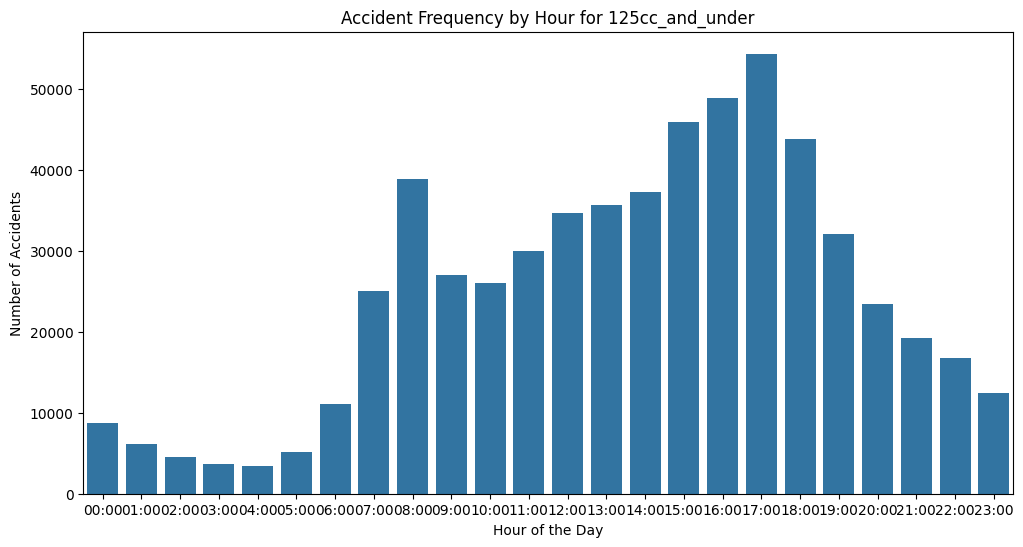

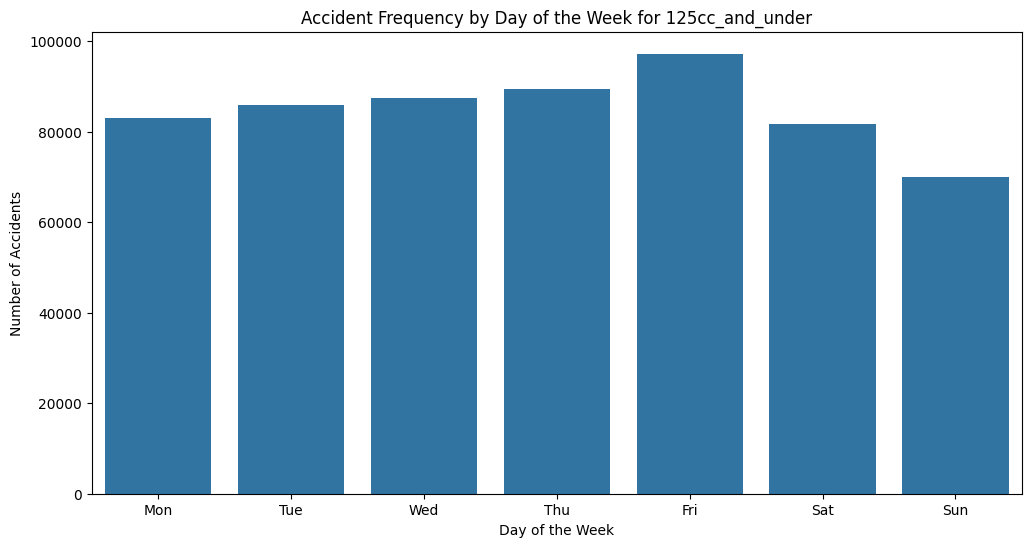

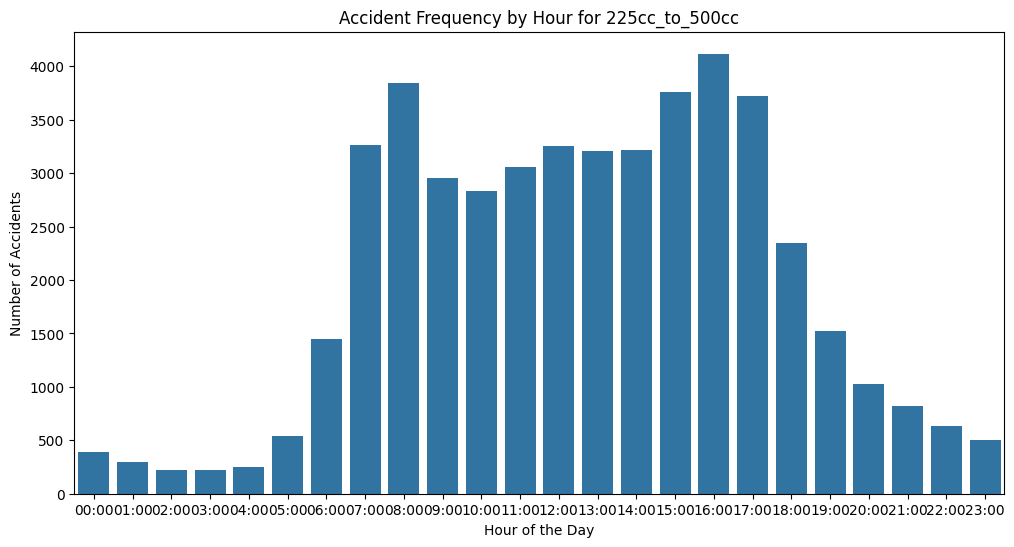

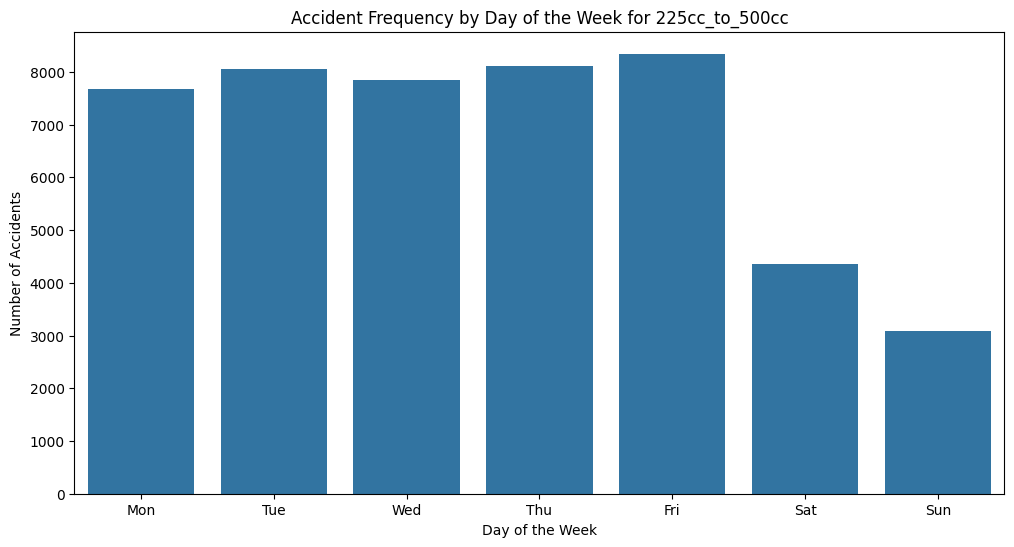

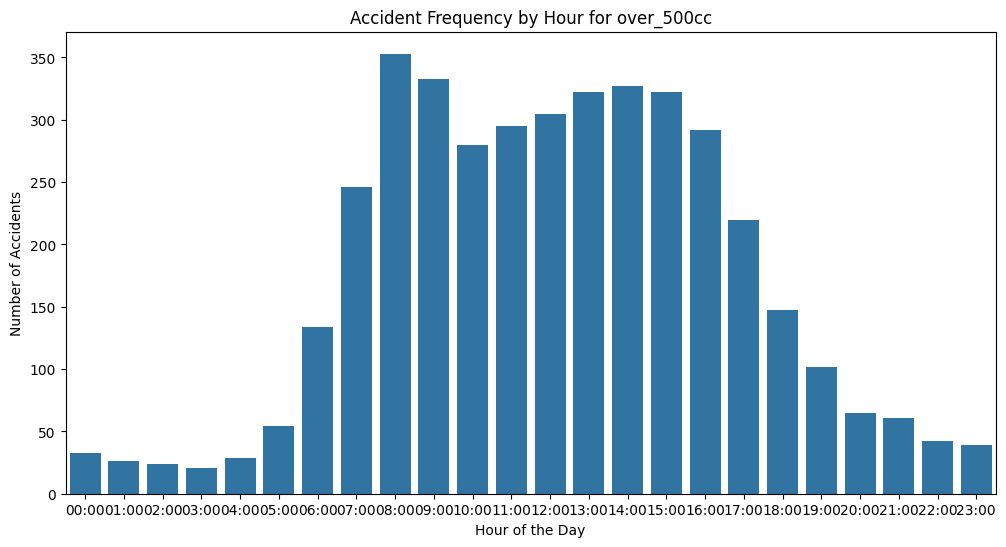

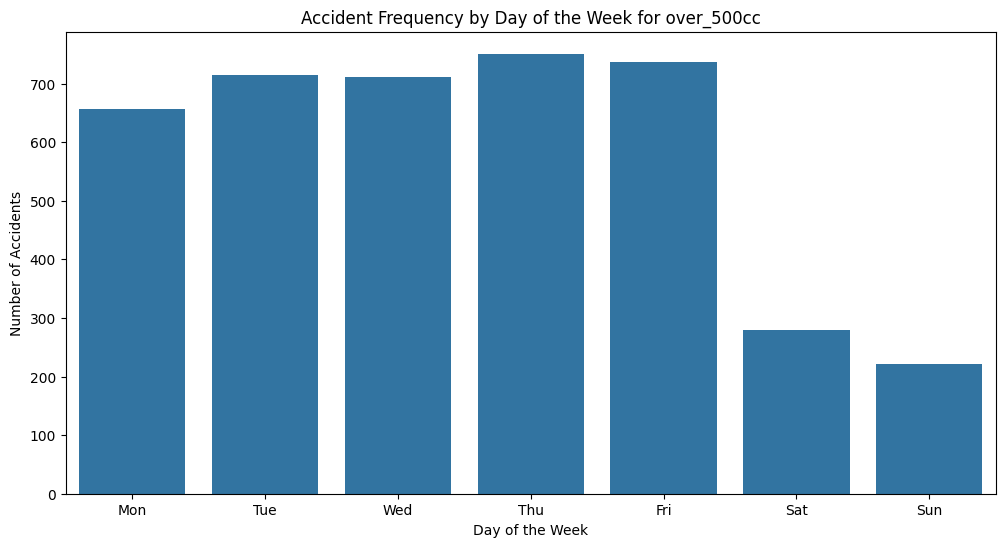

In [4]:
# Iterate over each category of motorcycle codes and perform analysis
for category, codes in motorcycle_codes_dict.items():
    motorbike_accidents = full_df[full_df['vehicle_type'].isin(codes)]

    # Check if there are any motorbike accidents
    if motorbike_accidents.empty:
        print(f"No motorbike accidents found for {category}.")
        continue

    # Check if 'hour' column exists and has data
    if 'hour' not in motorbike_accidents.columns or motorbike_accidents['hour'].isnull().all():
        print(f"'hour' column is missing or empty for {category}.")
        continue

    # Aggregate the number of accidents by hour and day of the week
    hour_counts = motorbike_accidents['hour'].value_counts().sort_index()
    day_counts = motorbike_accidents['day_of_week'].value_counts().sort_index()

    # Ensure there is data to plot
    if hour_counts.empty:
        print(f"No hour data to plot for {category}.")
    else:
        # Visualize the number of accidents by hour
        plt.figure(figsize=(12, 6))
        sns.barplot(x=hour_counts.index, y=hour_counts.values)
        plt.title(f'Accident Frequency by Hour for {category}')
        plt.xlabel('Hour of the Day')
        plt.ylabel('Number of Accidents')
        plt.xticks(ticks=np.arange(24), labels=[f'{i:02d}:00' for i in range(24)])
        plt.show()

    # Ensure there is data to plot for day of the week
    if day_counts.empty:
        print(f"No day of the week data to plot for {category}.")
    else:
        # Visualize the number of accidents by day of the week
        plt.figure(figsize=(12, 6))
        sns.barplot(x=day_counts.index, y=day_counts.values)
        plt.title(f'Accident Frequency by Day of the Week for {category}')
        plt.xlabel('Day of the Week')
        plt.ylabel('Number of Accidents')
        plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        plt.show()


# **Task 3: Pedestrian Accidents Hourly and Weekly**

Number of pedestrian-involved accidents: 106287


<ipython-input-5-1f034f3769b5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrian_involved['hour'] = pedestrian_involved['datetime'].dt.hour
<ipython-input-5-1f034f3769b5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pedestrian_involved['day_of_week'] = pedestrian_involved['datetime'].dt.dayofweek # Monday=0, Sunday=6


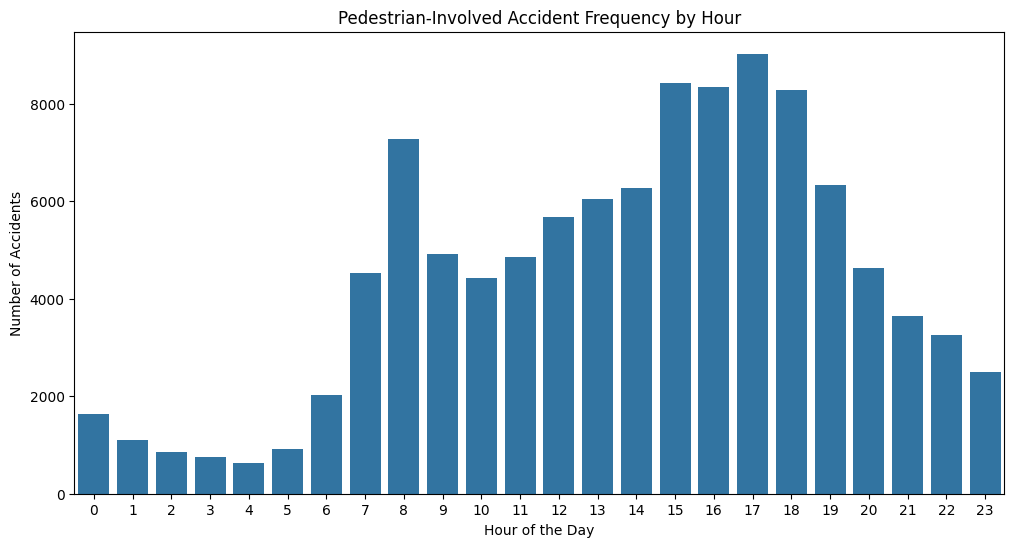

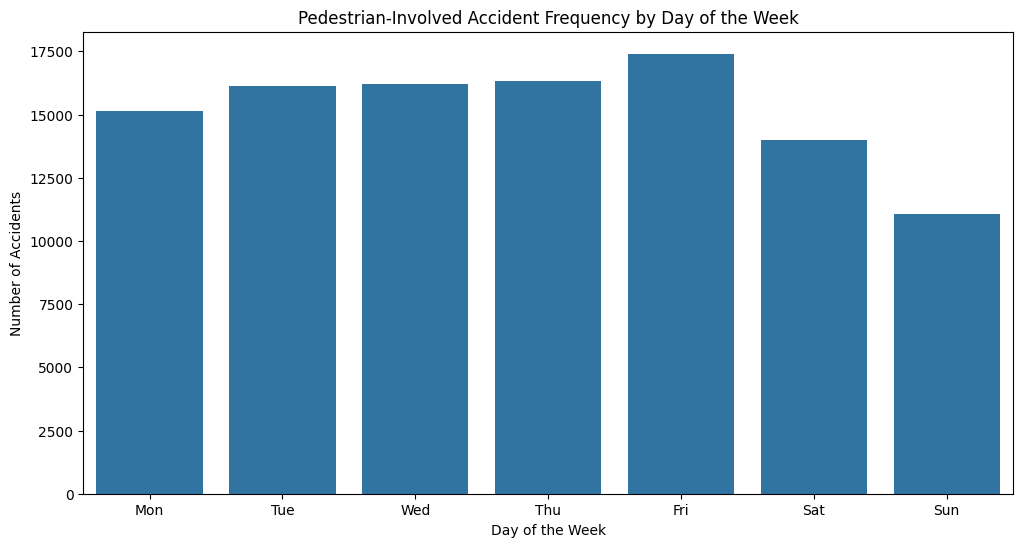

In [5]:
# Filter the dataset for accidents involving pedestrian crossings
pedestrian_involved = df[(df['pedestrian_crossing_human_control'] > 0) |
                         (df['pedestrian_crossing_physical_facilities'] > 0)]

# Check the number of pedestrian-related accidents
print("Number of pedestrian-involved accidents:", pedestrian_involved.shape[0])
if pedestrian_involved.empty:
    print("No pedestrian-involved accidents to analyze.")
else:
    # Extract hour and day of the week from 'datetime'
    pedestrian_involved['hour'] = pedestrian_involved['datetime'].dt.hour
    pedestrian_involved['day_of_week'] = pedestrian_involved['datetime'].dt.dayofweek # Monday=0, Sunday=6

    # Plotting the frequency of pedestrian-involved accidents by hour
    plt.figure(figsize=(12, 6))
    sns.countplot(x='hour', data=pedestrian_involved)
    plt.title('Pedestrian-Involved Accident Frequency by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Accidents')
    plt.show()

    # Plotting the frequency of pedestrian-involved accidents by day of the week
    plt.figure(figsize=(12, 6))
    sns.countplot(x='day_of_week', data=pedestrian_involved)
    plt.title('Pedestrian-Involved Accident Frequency by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Accidents')
    plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    plt.show()


# **Task 4: Using the apriori algorithm, explore the impact of selected variables on accident severity.**

In [6]:
!pip install mlxtend

In [8]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

#Prepare your dataset
selected_variables = ['road_type', 'weather_conditions', 'light_conditions', 'accident_severity']
df_selected = df[selected_variables].copy()  # Create a copy to avoid the SettingWithCopyWarning

# Convert accident severity to binary (1 for severe, 0 for non-severe), assuming '1' represents a severe accident
df_selected['severe'] = df_selected['accident_severity'].apply(lambda x: 1 if x == 1 else 0)

# Drop the original 'accident_severity' as we now have a binary 'severe' column
df_selected.drop('accident_severity', axis=1, inplace=True)

# Display the prepared dataset
print(df_selected.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   road_type  weather_conditions  light_conditions  severe
0          6                   1                 4       1
1          6                   1                 4       0
2          6                   1                 4       0
3          1                   2                 4       0
4          3                   1                 4       0


In [10]:
# Assuming df_selected is already prepared from the previous steps
#One-hot encode the categorical variables
df_onehot = pd.get_dummies(df_selected, columns=['road_type', 'weather_conditions', 'light_conditions'])

# Display the one-hot encoded dataframe for verification
print(df_onehot.head())

#Apply the apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_onehot, min_support=0.01, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   severe  road_type_1  road_type_2  road_type_3  road_type_6  road_type_7  \
0       1        False        False        False         True        False   
1       0        False        False        False         True        False   
2       0        False        False        False         True        False   
3       0         True        False        False        False        False   
4       0        False        False         True        False        False   

   road_type_9  weather_conditions_-1  weather_conditions_1  \
0        False                  False                  True   
1        False                  False                  True   
2        False                  False                  True   
3        False                  False                 False   
4        False                  False                  True   

   weather_conditions_2  ...  weather_conditions_6  weather_conditions_7  \
0                 False  ...                 False                 False   


/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support       itemsets
0  0.013864       (severe)
1  0.061667  (road_type_1)
2  0.024671  (road_type_2)
3  0.155216  (road_type_3)
4  0.724789  (road_type_6)


In [11]:
#Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Display the rules sorted by confidence
rules.sort_values(by='confidence', ascending=False, inplace=True)
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


                          antecedents                          consequents  \
65  (road_type_6, light_conditions_1)               (weather_conditions_1)   
42  (light_conditions_1, road_type_1)               (weather_conditions_1)   
31               (light_conditions_1)               (weather_conditions_1)   
48  (road_type_2, light_conditions_1)               (weather_conditions_1)   
51  (road_type_3, light_conditions_1)               (weather_conditions_1)   
..                                ...                                  ...   
61               (light_conditions_4)  (road_type_3, weather_conditions_1)   
55               (light_conditions_1)  (road_type_3, weather_conditions_1)   
18                      (road_type_6)               (weather_conditions_2)   
56             (weather_conditions_1)    (road_type_3, light_conditions_1)   
63  (road_type_3, light_conditions_1)               (weather_conditions_2)   

     support  confidence  
65  0.440490    0.842007  
42  0.037

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **Task 5: Analyzing Accident Distribution using Clustering**

In [13]:
# Load data from the 'lsoa' table
lsoa_query = "SELECT * FROM lsoa;"
lsoa_df = pd.read_sql_query(lsoa_query, conn)

# Show the first few rows of the lsoa dataframe to confirm it's loaded correctly
print(lsoa_df.head())

# Show summary statistics and information about the lsoa dataframe
print(lsoa_df.describe())
print(lsoa_df.info())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   objectid   lsoa01cd             lsoa01nm            lsoa01nmw  \
0         1  E01000001  City of London 001A  City of London 001A   
1         2  E01000002  City of London 001B  City of London 001B   
2         3  E01000003  City of London 001C  City of London 001C   
3         4  E01000004  City of London 001D  City of London 001D   
4         5  E01000005  City of London 001E  City of London 001E   

    shape__area  shape__length                              globalid  
0  1.298652e+05    2635.772001  68cc6127-1008-4fbe-a16c-78fb089a7c43  
1  2.284189e+05    2707.986202  937edbc3-c1bf-4d35-b274-b0a1480a7c09  
2  5.905477e+04    1224.774479  2686dcaf-10b9-4736-92af-4788d4feaa69  
3  2.544551e+06   10718.466240  3c493140-0b3f-4b9a-b358-22011dc5fb89  
4  1.895782e+05    2275.809358  b569093d-788d-41be-816c-d6d7658b2311  
           objectid   shape__area  shape__length
count  34378.000000  3.437800e+04   34378.000000
mean   17189.500000  4.484756e+06    8672.586392
std     9924.21811

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-14-6e3538f1725d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regional_df['cluster'] = kmeans.fit_predict(cluster_features)


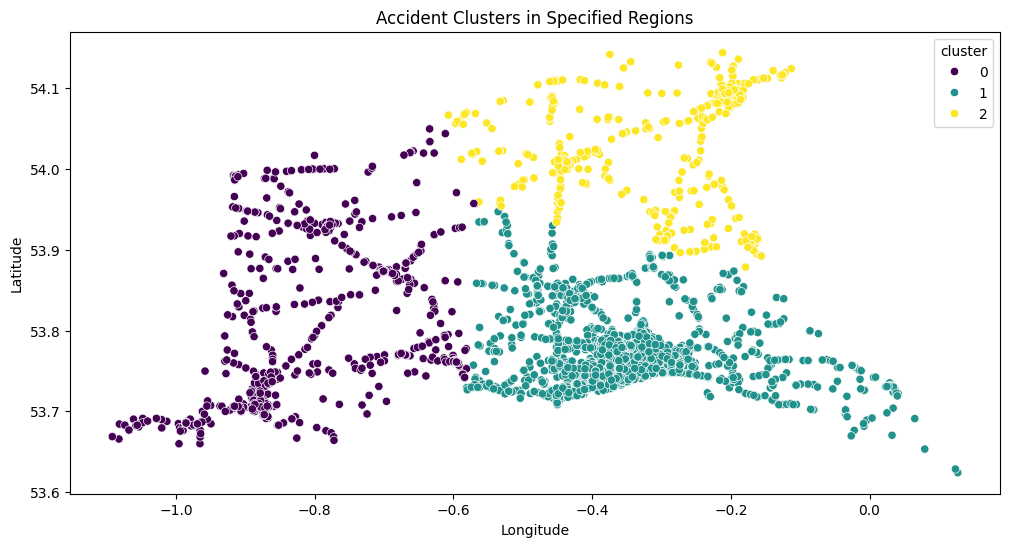

Cluster Centers:
[[-0.80263302 53.80339795]
 [-0.35185681 53.76626631]
 [-0.29298588 54.03899295]]


In [14]:
# Merge accident data with LSOA data based on LSOA code
# Assuming the common key is 'lsoa_of_accident_location' in accident_df and 'lsoa01cd' in lsoa_df
merged_df = pd.merge(df, lsoa_df, left_on='lsoa_of_accident_location', right_on='lsoa01cd', how='left')

# Define the regions of interest
regions = ['Kingston upon Hull', 'Humberside', 'East Riding of Yorkshire']

# Filter data for specified regions using the 'lsoa01nm' column in the merged dataframe
regional_df = merged_df[merged_df['lsoa01nm'].str.contains('|'.join(regions), case=False, na=False)]

# Check if the dataframe has any accidents in the specified regions
if regional_df.empty:
    print("No accidents found in the specified regions.")
else:
    # Select relevant features for clustering
    cluster_features = regional_df[['longitude', 'latitude']].dropna()  # Drop rows with missing values in these columns

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)  # Choose appropriate number of clusters
    regional_df['cluster'] = kmeans.fit_predict(cluster_features)

    # Plot clusters
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=regional_df, palette='viridis')
    plt.title('Accident Clusters in Specified Regions')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

    # Print cluster centroids to interpret cluster centers
    print("Cluster Centers:")
    print(kmeans.cluster_centers_)


# **Task 6: Identify unusual entries Using outlier detection Method**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Number of outliers detected: 11558
     accident_index  accident_year_x accident_reference_x  \
8164  2017010021193             2017            010021193   
8165  2017010021193             2017            010021193   
8166  2017010021193             2017            010021193   
8167  2017010021193             2017            010021193   
8168  2017010021193             2017            010021193   

      location_easting_osgr  location_northing_osgr  longitude   latitude  \
8164               537890.0                172340.0  -0.017706  51.433289   
8165               537890.0                172340.0  -0.017706  51.433289   
8166               537890.0                172340.0  -0.017706  51.433289   
8167               537890.0                172340.0  -0.017706  51.433289   
8168               537890.0                172340.0  -0.017706  51.433289   

      police_force  accident_severity  number_of_vehicles  ...  \
8164             1                  1                   1  ...   
816

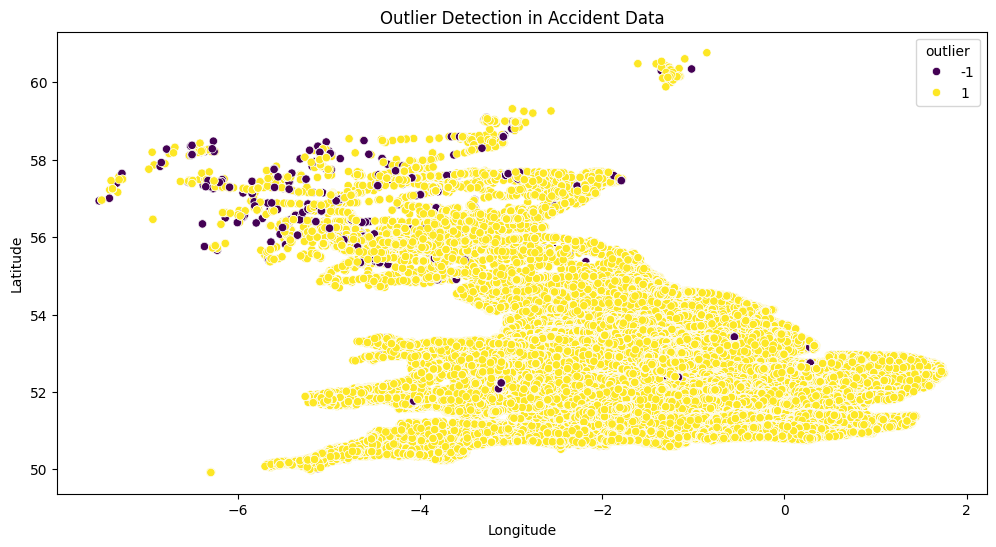

In [15]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest


# Load data from tables
casualty_df = pd.read_sql_query("SELECT * FROM casualty;", conn)
vehicle_df = pd.read_sql_query("SELECT * FROM vehicle;", conn)

# Merge tables appropriately
merged_df = pd.merge(df, casualty_df, on='accident_index', how='left')
merged_df = pd.merge(merged_df, vehicle_df, on='accident_index', how='left')
merged_df = pd.merge(merged_df, lsoa_df, left_on='lsoa_of_accident_location', right_on='lsoa01cd', how='left')


# Select relevant features for outlier detection
features = ['longitude', 'latitude', 'number_of_vehicles', 'number_of_casualties', 'accident_severity']

# Handle missing values before applying Isolation Forest

# Drop rows with any missing values in the selected features
outlier_data = merged_df[features].dropna()
# Impute missing values (e.g., with mean, median, or a more sophisticated method)
outlier_data = merged_df[features].fillna(merged_df[features].mean())

# Initialize and fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
outlier_predictions = iso_forest.fit_predict(outlier_data)

# Add outlier predictions back to the merged dataframe, aligning by index
merged_df['outlier'] = pd.Series(outlier_predictions, index=outlier_data.index)

# Identify the outliers
outliers = merged_df[merged_df['outlier'] == -1]
print("Number of outliers detected:", len(outliers))

# For demonstration, we will print some outliers and their details
print(outliers.head())


# Visualize the outliers
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='outlier', data=merged_df, palette='viridis', legend='full')
plt.title('Outlier Detection in Accident Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# **Task 7: Developing Classification Model**

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select relevant features and target variable for classification
features = ['longitude', 'latitude', 'number_of_vehicles', 'number_of_casualties', 'speed_limit', 'weather_conditions', 'road_surface_conditions']
target = 'accident_severity'

# Handle missing values
merged_df = merged_df[features + [target]].dropna()

# Encode categorical variables if necessary (e.g., 'weather_conditions', 'road_surface_conditions')
label_encoders = {}
for column in ['weather_conditions', 'road_surface_conditions']:
    label_encoders[column] = LabelEncoder()
    merged_df[column] = label_encoders[column].fit_transform(merged_df[column])

# Split data into training and testing sets
X = merged_df[features]
y = merged_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Classification Report:
               precision    recall  f1-score   support

           1       0.94      0.83      0.88      6366
           2       0.89      0.79      0.83     66388
           3       0.95      0.98      0.96    274641

    accuracy                           0.94    347395
   macro avg       0.92      0.86      0.89    347395
weighted avg       0.94      0.94      0.94    347395

Confusion Matrix:
 [[  5266    180    920]
 [    89  52303  13996]
 [   259   6558 267824]]


# **Correlation Matrix of Selected Features**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


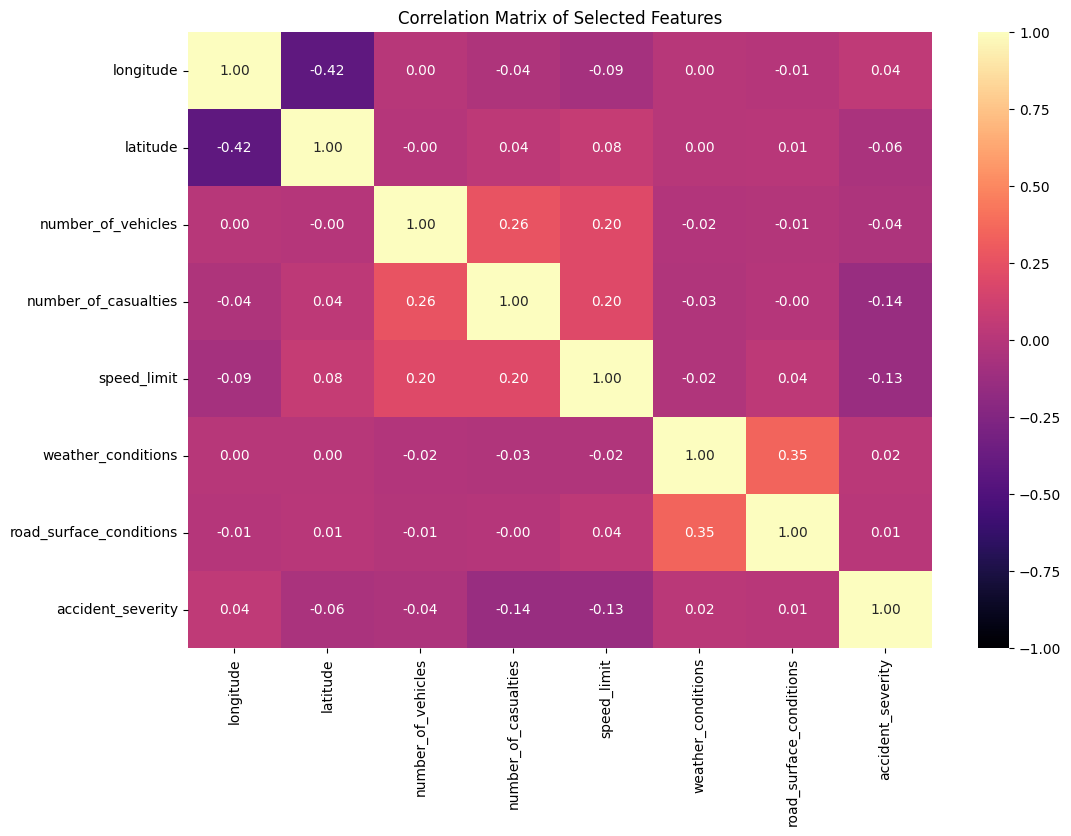

In [17]:
# Calculate the correlation matrix
corr_matrix = merged_df.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='magma', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features')
plt.show()
